In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
df = pd.read_csv("/traffic_data.csv")

In [4]:
df = df[["timestamp","road_id", "length", "speed", "speedUncapped", "freeFlow", "jamFactor"]]

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract year, month, date, hour, and minute components into separate columns
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['Hour'] = df['timestamp'].dt.hour
df['Minute'] = df['timestamp'].dt.minute

df = df.drop("timestamp", axis=1)

In [6]:
df

,road_id,length,speed,speedUncapped,freeFlow,jamFactor,Year,Month,Day,Hour,Minute
0,1,892.0,8.024415,8.024415,11.456153,2.827130,2023,6,16,17,15
1,2,52.0,13.888889,15.555556,13.888889,0.000000,2023,6,16,17,15
2,3,75.0,2.777778,2.777778,7.777778,3.100000,2023,6,16,17,15
3,4,931.0,13.233083,13.233083,15.210945,1.337594,2023,6,16,17,15
4,5,747.0,9.875056,9.875056,14.194557,2.529317,2023,6,16,17,15
...,...,...,...,...,...,...,...,...,...,...,...
13837,1534,1516.0,4.129288,4.129288,12.122728,6.752375,2023,6,16,17,55
13838,1535,1157.0,9.433161,9.433161,11.461635,1.398704,2023,6,16,17,55
13839,1536,1421.0,18.482486,18.482486,21.042695,1.669458,2023,6,16,17,55
13840,1537,2088.0,9.301964,9.301964,14.534643,3.023372,2023,6,16,17,55


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X = df.drop(['speed', 'speedUncapped', 'freeFlow', 'jamFactor'], axis=1)
y = df[['speed', 'speedUncapped', 'freeFlow', 'jamFactor']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 0.586841392377212
R-squared: 0.9190850202956015


In [16]:
y_pred

array([[ 6.49536308,  6.49536308,  9.35344902,  1.78198182],
       [10.55519537, 10.69960823, 10.30329377,  0.81471875],
       [15.83594906, 15.83594906, 22.26084918,  3.86021349],
       ...,
       [11.17351541, 11.25107959, 12.68773107,  1.11850861],
       [ 4.61821627,  4.61821627,  8.55499188,  5.82224176],
       [ 3.71865739,  3.71865739,  8.62726107,  4.21678374]])

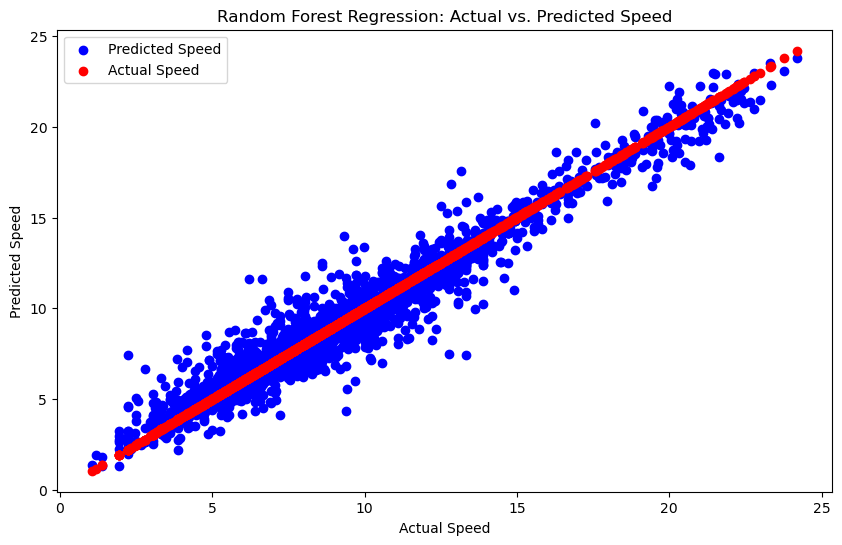

In [17]:
import matplotlib.pyplot as plt

# Plotting the predictions against the actual results
plt.figure(figsize=(10, 6))
plt.scatter(y_test['speed'], y_pred[:, 0], color='blue', label='Predicted Speed')
plt.scatter(y_test['speed'], y_test['speed'], color='red', label='Actual Speed')
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Random Forest Regression: Actual vs. Predicted Speed')
plt.legend()
plt.show()

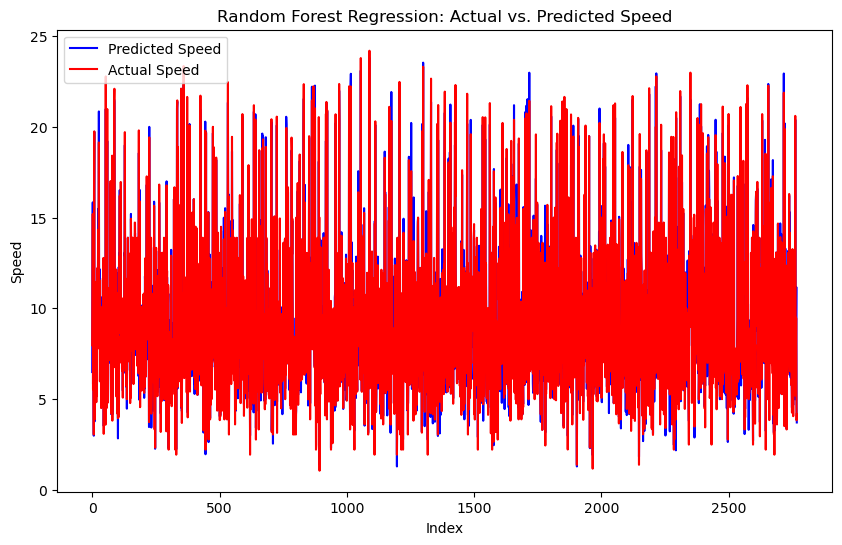

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of indices for the x-axis
x_indices = np.arange(len(y_test))

# Plotting the predictions against the actual results
plt.figure(figsize=(10, 6))
plt.plot(x_indices, y_pred[:, 0], color='blue', label='Predicted Speed')
plt.plot(x_indices, y_test['speed'], color='red', label='Actual Speed')
plt.xlabel('Index')
plt.ylabel('Speed')
plt.title('Random Forest Regression: Actual vs. Predicted Speed')
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [23]:
fine_rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(fine_rf, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [24]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [27]:
best_params 

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
best_model 

In [25]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

Mean Squared Error on test set: 0.5876150507091614
